In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Milan Škriniar,sk SVK,DF,Paris S-G+Inter,fr Ligue 1+it Serie A,0.0,1995.0,112.0,103.0,9325,103.7,0.06,0.06,0.06,0.06,0.06,0.08,0.06,0.08,28.0,23.0,82.14,4.0,14.29,80.77,8.45,35.72,40.38,4.99,0.79,80.77,0.27,0.22,0.04,53.06,246.53,121.18,0.97,0.71,0.01,0.52,0.23,61.06,0.81,0.78,0.04,0.65,0.00,0.01,0.09,0.04,0.65,0.04,0.00,0.00,0.00,0.00,0.00,7001.0,7533.0,92.94,127807.0,38169.0,2585.0,2753.0,94.52,3689.0,3846.0,95.92,586.0,742.0,78.98,0.00,0.01,0.02,-0.01,0.24,3.91,0.24,0.03,3.71,72.64,69.96,2.61,1.75,0.04,0.51,0.13,0.71,0.00,0.00,0.00,0.00,67.51,0.07,0.27,0.00,0.15,0.00,11.35,0.00,-0.5,-0.5,47.20,0.10,0.01,0.01,1.22,0.71,0.03,0.77,0.92,0.00,0.01,5.27,1.21,1.34,1.43,0.83,0.49,0.10,0.76,1.25,0.49,0.99,0.64,2.20,2.66,0.07,61.21,4,0,0,3,1,0
1,1,Maxence Lacroix,fr FRA,DF,Wolfsburg,de Bundesliga,0.0,2000.0,111.0,103.0,9070,100.8,0.06,0.08,0.06,0.08,0.04,0.06,0.04,0.06,75.0,58.0,77.33,17.0,22.67,70.67,8.29,37.50,31.56,2.13,0.84,70.67,0.74,0.58,0.17,40.25,207.32,110.79,0.57,0.47,0.05,0.73,0.26,43.50,0.27,0.87,0.06,0.72,0.02,0.03,0.07,0.02,0.72,0.05,0.00,0.00,0.01,0.00,0.00,4893.0,5859.0,83.51,102529.0,36399.0,1344.0,1562.0,86.11,2923.0,3193.0,91.54,645.0,1011.0,63.80,0.01,0.02,0.03,-0.00,0.22,3.36,0.19,0.02,4.02,58.13,55.23,2.72,2.26,0.03,0.47,0.21,0.11,0.00,0.00,0.00,0.00,48.54,0.18,0.51,0.00,0.14,0.00,10.89,0.00,1.8,1.8,57.18,0.16,0.06,0.02,1.06,0.82,0.01,1.74,1.03,0.00,0.04,5.95,2.48,1.86,1.77,1.20,0.53,0.04,0.89,1.40,0.5

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out only the Forwards (FW) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'] == 'FW']
newbie=newbie[newbie['Pos']=='FW']
player_2021=player_2021[player_2021['Pos']=='FW']
player_2022=player_2022[player_2022['Pos']=='FW']
player_2023=player_2023[player_2023['Pos']=='FW']
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)

In [5]:
# filter player_2024
player_2024= player_2024.loc[player_2024['Min']>= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [6]:
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)
player_2024 = player_2024.reset_index(drop=True)

In [7]:
Salah_2024=player_2024[player_2024['Player']=='Mohamed Salah']
Salah_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
1131,2315,Mohamed Salah,eg EGY,FW,Liverpool,eng Premier League,0.0,1992.0,32,28,2534,28.2,0.64,0.99,0.46,0.82,0.75,1.17,0.55,0.97,77.0,27.0,35.1,49.0,63.6,48.19,0.14,1.67,16.31,30.71,8.55,47.94,2.73,0.96,1.74,34.65,188.26,92.7,3.48,1.91,2.34,2.73,2.09,39.57,12.09,4.94,0.71,3.65,0.07,0.25,0.74,0.18,0.04,0.5,0.0,0.07,0.11,0.04,0.0,737.0,1010.0,73.0,10826.0,3213.0,433.0,510.0,84.9,234.0,331.0,70.7,43.0,65.0,66.2,0.35,0.42,0.27,-0.06,2.34,1.99,2.41,0.21,5.21,35.82,34.33,0.99,0.14,0.64,0.11,1.45,0.71,0.0,0.0,0.0,0.0,26.13,0.5,1.49,3.8,1.67,0.12,0.28,0.15,-3.2,-2.5,30.0,0.07,0.0,0.0,0.43,0.92,0.6,0.07,0.39,0.04,0.0,2.98,0.21,0.5,0.6,0.04,0.28,0.28,0.21,0.74,0.53,0.67,0.04,0.67,0.04,0.0,28.6


In [8]:
Salah_2023=player_2023[player_2023['Player']=='Mohamed Salah']
Salah_2023

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
140,2334,Mohamed Salah,eg EGY,FW,Liverpool,eng Premier League,30,1992,38,37,3290,36.6,0.52,0.85,0.47,0.79,0.59,0.8,0.51,0.72,134.0,50.0,37.3,72.0,53.7,44.64,0.11,2.27,14.73,28.09,8.22,44.54,3.66,1.37,1.97,30.25,174.37,82.95,3.28,1.8,2.38,3.01,2.16,35.66,11.5,3.83,0.66,2.9,0.05,0.33,0.33,0.16,0.05,0.46,0.03,0.0,0.05,0.08,0.03,902.0,1185.0,76.1,12538.0,3403.0,533.0,648.0,82.3,283.0,352.0,80.4,38.0,66.0,57.6,0.0,0.21,0.2,0.12,1.78,1.45,2.19,0.19,4.07,32.38,31.31,0.79,0.11,0.38,0.08,1.04,0.46,0.0,0.0,0.0,0.0,24.64,0.27,1.09,3.31,1.23,0.14,0.38,0.15,-2.7,-1.5,21.1,0.05,0.0,0.0,0.55,0.9,0.6,0.16,0.33,0.0,0.0,2.73,0.22,0.82,0.57,0.11,0.14,0.33,0.27,0.71,0.44,0.57,0.0,0.74,0.11,0.0,38.5


In [9]:
Salah_2022=player_2022[player_2022['Player']=='Mohamed Salah']
Salah_2022

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
138,2355,Mohamed Salah,eg EGY,FW,Liverpool,eng Premier League,29,1992,35,30,2762,30.7,0.75,1.17,0.59,1.01,0.74,1.07,0.58,0.91,124.0,53.0,42.7,71.0,57.3,50.55,0.23,1.79,14.82,34.4,9.8,50.36,4.04,1.73,2.31,33.55,192.12,94.76,4.07,1.86,3.16,3.22,2.64,42.35,14.69,4.59,0.81,3.39,0.0,0.55,0.59,0.07,0.0,0.55,0.0,0.16,0.07,0.03,0.0,875.0,1136.0,77.0,11516.0,3063.0,567.0,648.0,87.5,233.0,309.0,75.4,29.0,49.0,59.2,0.0,0.33,0.24,0.1,2.02,1.5,1.86,0.13,3.97,37.0,36.22,0.49,0.03,0.59,0.1,1.34,0.23,0.03,0.03,0.0,0.0,28.5,0.29,1.24,4.33,1.6,0.14,0.37,0.13,0.3,0.2,17.5,0.03,0.0,0.0,0.39,0.75,0.39,0.2,0.26,0.07,0.0,2.8,0.23,1.07,0.55,0.16,0.29,0.1,0.2,0.62,0.42,0.23,0.03,0.75,0.16,0.0,31.6


In [10]:
Salah_2021=player_2021[player_2021['Player']=='Mohamed Salah']
Salah_2021

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
151,2303.0,Mohamed Salah,eg EGY,FW,Liverpool,eng Premier League,28.0,1992.0,37.0,34.0,3078,34.2,0.64,0.79,0.47,0.61,0.56,0.75,0.43,0.61,84.0,36.0,42.9,48.0,57.1,49.56,0.32,1.9,16.64,31.37,8.04,49.39,2.46,1.05,1.4,34.65,177.95,88.71,3.25,2.08,2.11,3.39,2.4,41.52,11.58,3.92,0.47,3.04,0.03,0.2,0.38,0.2,0.06,0.35,0.0,0.0,0.06,0.06,0.0,1067.0,1302.0,82.0,13390.0,3013.0,718.0,796.0,90.2,246.0,316.0,77.8,36.0,54.0,66.7,0.0,0.18,0.2,-0.04,1.61,1.73,2.11,0.15,3.98,38.07,37.02,0.94,0.09,0.29,0.12,0.85,0.18,0.0,0.0,0.0,0.0,31.2,0.12,1.17,3.51,1.35,0.13,0.35,0.12,2.7,1.4,30.0,0.0,0.0,0.0,0.64,0.64,0.38,0.03,0.26,0.06,0.0,2.72,0.53,1.23,0.53,0.12,0.12,0.29,0.2,0.47,0.26,0.29,0.0,0.56,0.29,0.03,43.8


In [11]:
Salah=forward_players[forward_players['Player']=='Mohamed Salah']
Salah

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
56,430,Mohamed Salah,eg EGY,FW,Liverpool,eng Premier League,0.0,1992.0,142.0,129.0,11664,129.7,0.63,0.94,0.5,0.8,0.65,0.93,0.51,0.79,419.0,166.0,39.62,240.0,57.28,48.11,0.2,1.93,15.6,31.02,8.62,47.94,3.23,1.28,1.85,33.15,182.54,89.38,3.5,1.91,2.48,3.1,2.32,39.64,12.4,4.27,0.66,3.22,0.04,0.33,0.49,0.15,3.22,0.46,0.01,0.05,0.07,0.05,0.01,3581.0,4633.0,77.29,48270.0,12742.0,2100.0,2454.0,86.51,996.0,1308.0,76.15,146.0,234.0,62.39,0.08,0.28,0.22,0.03,1.91,1.65,2.14,0.17,4.27,35.72,34.63,0.8,0.09,0.46,0.1,1.15,0.39,0.01,0.01,0.0,0.0,27.61,0.29,1.23,0.0,1.44,0.0,14.02,0.0,-2.9,-2.4,24.54,0.04,0.0,0.0,0.51,0.8,0.49,0.12,0.31,0.04,0.0,2.8,0.3,0.92,0.56,0.11,0.2,0.25,0.22,0.63,0.41,0.44,0.02,0.68,0.15,0.01,36.11,4,4,0,0,0,0


In [12]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
salah_percentile_ranks = round(players_percentile_ranks.iloc[[56]],0)

# Print the percentile ranks for Declan Rice
salah_percentile_ranks


,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
56,89.0,96.0,84.0,94.0,94.0,96.0,89.0,95.0,94.0,91.0,29.0,99.0,88.0,85.0,3.0,15.0,60.0,93.0,98.0,85.0,70.0,64.0,76.0,88.0,76.0,77.0,82.0,75.0,93.0,71.0,95.0,90.0,96.0,80.0,85.0,96.0,72.0,69.0,96.0,33.0,97.0,97.0,83.0,60.0,82.0,73.0,85.0,98.0,98.0,82.0,98.0,98.0,98.0,98.0,88.0,98.0,98.0,69.0,88.0,87.0,65.0,62.0,97.0,93.0,71.0,92.0,83.0,97.0,76.0,94.0,86.0,88.0,27.0,65.0,99.0,48.0,68.0,79.0,60.0,73.0,38.0,46.0,88.0,94.0,86.0,18.0,81.0,19.0,97.0,18.0,15.0,20.0,7.0,8.0,36.0,43.0,4.0,8.0,45.0,18.0,31.0,67.0,41.0,50.0,7.0,14.0


In [13]:
# Extract the percentile ranks, transpose, and sort them in descending order
salah_percentile_ranks_sorted = salah_percentile_ranks.T.sort_values(by=56, ascending=False)

# Get the top 20 parameters
top_20_params = salah_percentile_ranks_sorted.index[:30]
top_20_params_values = salah_percentile_ranks_sorted[56].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Tackled_Take_Ons', 'Through_Balls_per_90', 'Passes_Short_Att',
       'Passes_TotDist', 'Passes_Medium_Cmp', 'Passes_Short_Cmp',
       'Touches_Att_Pen_per_90', 'Passes_PrgDist', 'Passes_Total_Att',
       'Passes_Total_Cmp', 'Passes_Medium_Att', 'Pass_Live_Goal_per_90',
       'Defensive_Shot_per_90', 'Passes_Penalty_Area_per_90',
       'Goals_per_shot_on_target', 'xAG_per_90',
       'Progressive_Passes_Received_per_90', 'G+A_per90', 'Shot-Shot_per_90',
       'Pass_Live_Shot_per_90', 'xG+xAG_per90', 'npxG+xAG_per90',
       'Dispossessed_per_90', 'Progressive_Passes_per_90',
       'Take_Ons_Attempted', 'Passes_Off_per_90', 'xG_per90', 'G+A-PK_per90',
       'xA_per_90', 'Carries_Penalty_Area_per_90'],
      dtype='object')
Values:
Tackled_Take_Ons                      99.0
Through_Balls_per_90                  99.0
Passes_Short_Att                      98.0
Passes_TotDist                        98.0
Passes_Medium_Cmp                     98.0
Passes_Shor

In [14]:
import pandas as pd





params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'Through_Balls_per_90','npxG+xAG_per90', 
        'Passes_Penalty_Area_per_90','Goals_per_shot_on_target',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
salah_percentile_ranks = round(players_percentile_ranks.iloc[[56]],0)

# Print the percentile ranks for Harry Kane
salah_percentile_ranks


,Goals_per90,Assists_per_90,G+A_per90,G-PK_per90,npxG_per90,xA_per_90,Through_Balls_per_90,npxG+xAG_per90,Passes_Penalty_Area_per_90,Goals_per_shot_on_target,Carries_per_90,Progressive_Carries_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Key_Passes_per_90
56,89.0,62.0,96.0,84.0,89.0,93.0,99.0,95.0,97.0,97.0,88.0,82.0,80.0,85.0,92.0


In [15]:
salah_percentile_ranks_list = salah_percentile_ranks.values.flatten().tolist()

salah_percentile_ranks_list

[89.0,
 62.0,
 96.0,
 84.0,
 89.0,
 93.0,
 99.0,
 95.0,
 97.0,
 97.0,
 88.0,
 82.0,
 80.0,
 85.0,
 92.0]

In [16]:
# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
salah_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[138]],0)
1
# Print the percentile ranks for Declan Rice
salah_2022_percentile_ranks

,Goals_per90,Assists_per_90,G+A_per90,G-PK_per90,npxG_per90,xA_per_90,Through_Balls_per_90,npxG+xAG_per90,Passes_Penalty_Area_per_90,Goals_per_shot_on_target,Carries_per_90,Progressive_Carries_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Key_Passes_per_90
138,95.0,45.0,98.0,90.0,94.0,96.0,97.0,97.0,93.0,56.0,88.0,89.0,82.0,85.0,92.0


In [17]:
salah_2022_percentile_ranks_list = salah_2022_percentile_ranks.values.flatten().tolist()

salah_2022_percentile_ranks_list

[95.0,
 45.0,
 98.0,
 90.0,
 94.0,
 96.0,
 97.0,
 97.0,
 93.0,
 56.0,
 88.0,
 89.0,
 82.0,
 85.0,
 92.0]

In [18]:
image_path = "Salah/Salah.jpg"
fdj_cropped = Image.open(image_path)


In [19]:
len(params)

15

In [20]:
params=['Goals_per90', 'Assists_per_90',  'Goals_+_Assists_per90', 
        'NonPenalty_Goals_per90',  'NonPenalty_xG_per90','Expected_Assisted_per_90', 'Through_Balls_per_90',
        'NonPenaltyxG_+_Expected_Assisted_Goals_per90', 
        'Passes_Penalty_Area_per_90','Goals_per_shot_on_target',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']


split_params = [param.replace('_', '\n') for param in params]


In [21]:
params=['Goals_per90', 'Assists_per_90',  'G+A_per90', 
        'G-PK_per90',  'npxG_per90','xA_per_90', 'Through_Balls_per_90','npxG+xAG_per90', 
        'Passes_Penalty_Area_per_90','Goals_per_shot_on_target',  
        'Carries_per_90', 'Progressive_Carries_per_90', 'Shot_Creating_Action_per90', 
         'Goal_Creating_Action_90','Key_Passes_per_90']


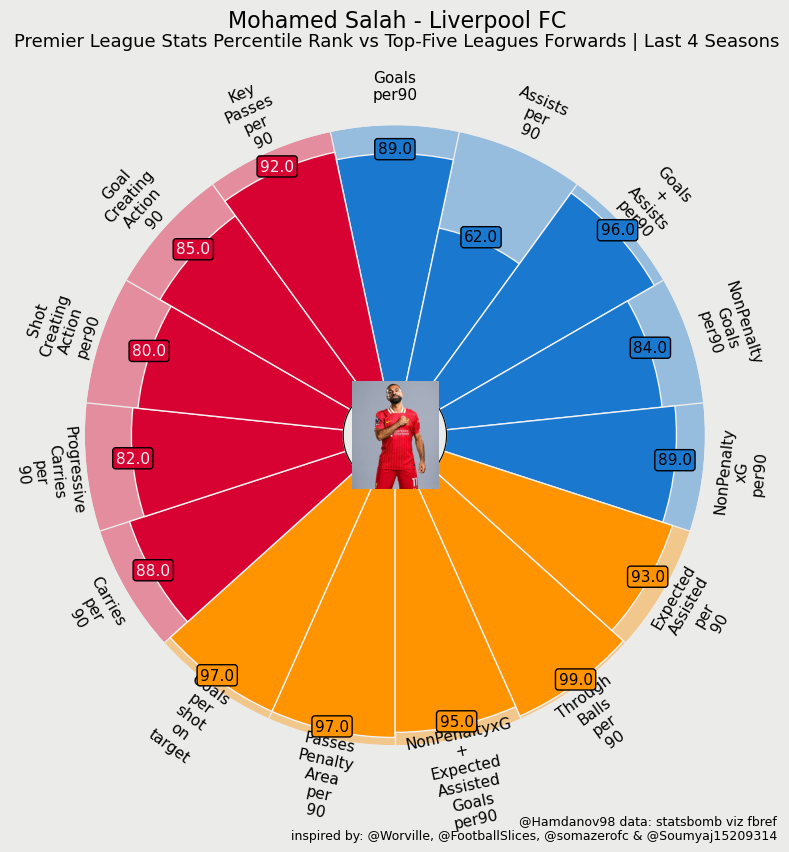

In [22]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    salah_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Mohamed Salah - Liverpool FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Forwards | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Salah/Salah_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [23]:
image_path = "Salah/Salah.png"
fdj_cropped = Image.open(image_path)

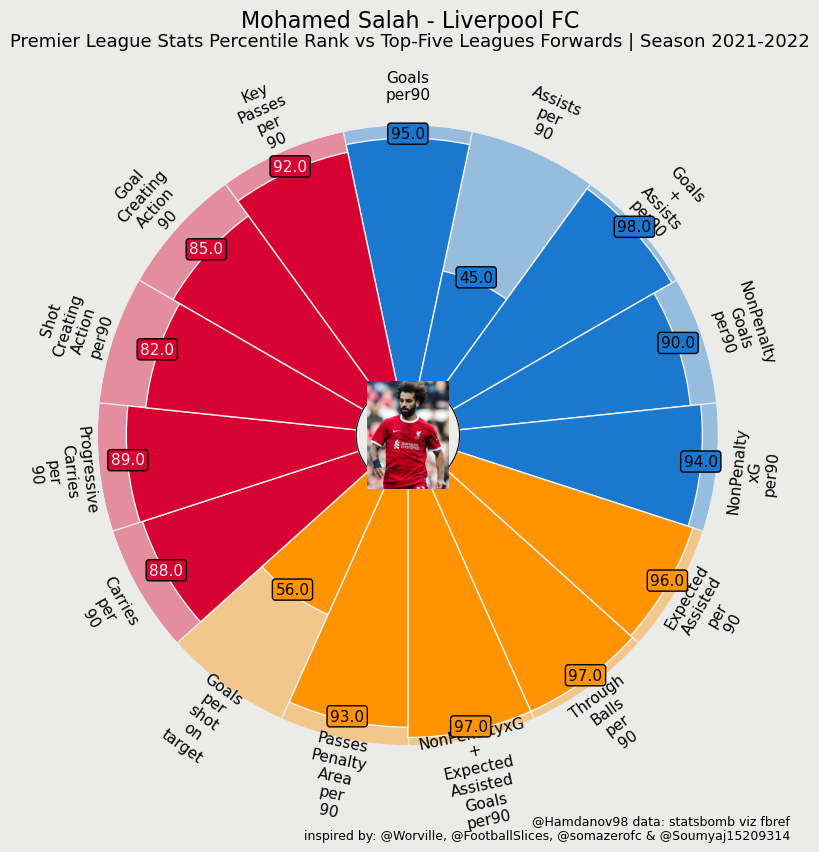

In [24]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    salah_2022_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Mohamed Salah - Liverpool FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Forwards | Season 2021-2022",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Salah_2022/Salah_2022_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [25]:
player_2024 = player_2024[player_2024['Player'] != 'Mohamed Salah']
player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [26]:
player_2024=pd.concat([player_2024,Salah_2022])
player_2024=player_2024.reset_index(drop=True)
player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [27]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in forward_players.columns:
        forward_players[feature]=-forward_players[feature]
        player_2024[feature]=-player_2024[feature]
        

In [28]:

# Normalize data
numerical_forward_players = forward_players[params].replace([np.inf, -np.inf], 0)
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_forward_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [29]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=forward_players.index)

In [30]:
# Get Salah's row and compute cosine similarity
salah_index = forward_players.index[forward_players['Player'] == 'Mohamed Salah'][0]
salah_data = transformed_df.loc[salah_index].values.reshape(1, -1)

# Remove Salah from the dataset for comparison
transformed_df = transformed_df.drop(index=salah_index)

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, salah_data).flatten()
transformed_df['similarity_to_salah'] = similarity_scores

# Get top 10 players most similar to Salah
top_similar_players_indices = transformed_df.sort_values('similarity_to_salah', ascending=False).index
top_similar_players = forward_players.loc[top_similar_players_indices]

In [32]:
# Visualize the resultsa
forward_players['similarity_to_salah'] = transformed_df['similarity_to_salah']
forward_players_sorted = forward_players.sort_values(by='similarity_to_salah', ascending=False)
forward_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_salah
58,451,Gabriel Jesus,br BRA,FW,Arsenal+Manchester City,eng Premier League,0.0,1997.0,110.0,84.0,7482,83.1,0.38,0.66,0.36,0.64,0.47,0.66,0.45,0.65,327.0,173.0,52.91,126.0,38.53,46.80,0.74,3.85,16.43,27.04,7.44,46.77,3.94,2.08,1.52,29.28,161.67,69.59,2.25,1.32,1.36,-3.30,-2.02,35.65,9.28,3.67,0.59,2.27,0.02,0.54,0.38,0.33,2.27,0.38,0.01,0.06,0.05,0.06,0.03,2232.0,2733.0,81.67,29657.0,5433.0,1352.0,1569.0,86.49,625.0,734.0,85.15,77.0,117.0,65.81,0.06,0.19,0.15,0.08,1.54,0.99,1.01,0.10,2.43,32.89,31.00,1.73,0.15,0.22,0.18,0.66,0.36,0.05,0.00,0.00,0.00,26.86,0.16,0.91,0.00,1.04,0.00,7.63,0.00,-6.8,-7.2,32.46,-0.18,-0.00,-0.00,-1.48,1.93,0.71,0.65,0.72,0.07,-0.01,3.61,1.18,-2.47,1.11,0.41,0.26,0.43,0.45,1.24,0.79,1.01,0.05,1.76,0.48,0.01,35.46,4,4,0,0,0,0,0.944805
0,10,Gerard Moreno,es ESP,FW,Villarreal,es La Liga,0.0,1992.0,101.0,86.0,7309,81.2,0.60,0.84,0.43,0.66,0.55,0.80,0.39,0.64,315.0,182.0,57.78,121.0,38.41,49.30,1.18,4.54,23.67,21.81,5.12,49.09,3.88,2.24,1.49,30.95,158.75,66.15,1.81,1.67,0.86,-2.49,-1.97,40.62,7.82,3.64,0.55,2.84,0.00,0.37,0.26,0.10,2.84,0.42,0.00,0.05,0.07,0.01,0.00,2198.0,3049.0,72.09,36821.0,7959.0,903.0,1121.0,80.50,751.0,965.0,77.82,243.0,366.0,66.39,0.07,0.25,0.18,-0.01,1.80,2.85,1.61,0.26,5.20,37.55,35.77,1.41,0.08,0.54,0.46,1.01,0.26,0.00,0.00,0.00,0.00,27.07,0.37,1.69,0.00,1.06,0.00,11.35,0.00,4.0,3.3,49.68,-0.11,-0.00,-0.00,-1.08,1.52,0.70,0.43,0.43,0.01,-0.00,3.08,1.55,-1

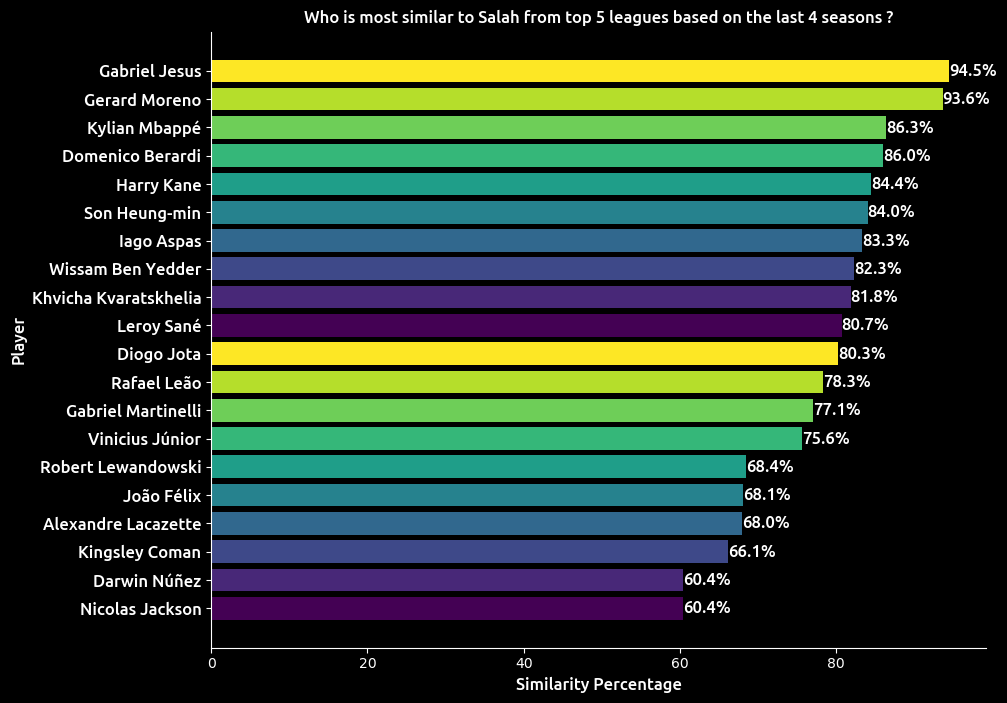

In [33]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_rice in descending order
forward_players_sorted = forward_players.sort_values(by='similarity_to_salah', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(20)[::-1], (forward_players_sorted['similarity_to_salah'].head(20)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Salah from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(20)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Salah/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [34]:
Sane=forward_players[forward_players['Player']=='Leroy Sané']
Sane

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_salah
25,184,Leroy Sané,de GER,FW,Bayern Munich,de Bundesliga,0.0,1996.0,123.0,85.0,7928,88.1,0.33,0.72,0.33,0.72,0.41,0.73,0.41,0.73,525.0,290.0,55.24,221.0,42.1,58.95,0.4,4.59,23.03,32.53,5.47,58.95,5.96,3.29,2.51,39.25,274.74,130.45,3.99,3.13,1.54,-2.93,-2.19,46.09,10.27,4.85,0.74,3.53,0.38,0.42,0.33,0.14,3.53,0.58,0.03,0.02,0.08,0.01,0.01,3173.0,3986.0,79.6,45814.0,11530.0,2041.0,2330.0,87.33,946.0,1158.0,81.69,195.0,327.0,59.63,0.12,0.32,0.33,0.07,2.15,2.42,1.91,0.17,5.09,45.24,42.72,2.36,0.31,0.27,0.18,2.44,0.41,1.33,0.61,0.48,0.02,36.02,0.16,1.11,0.0,1.24,0.0,5.9,0.0,-7.2,-7.2,38.07,-0.15,-0.0,-0.0,-0.93,1.01,0.34,0.35,0.73,0.01,-0.0,4.98,0.22,-0.35,1.12,0.27,0.61,0.24,0.5,1.23,0.74,0.73,0.02,1.48,0.16,0.05,37.58,4,0,0,0,0,4,0.807044


In [35]:
# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Ndayishimiye's stats from the percentile ranks DataFrame
Sane_percentile_ranks = round(players_percentile_ranks.iloc[[25]], 0)

# Print the percentile ranks for schlotterbeck
Sane_percentile_ranks

,Goals_per90,Assists_per_90,G+A_per90,G-PK_per90,npxG_per90,xA_per_90,Through_Balls_per_90,npxG+xAG_per90,Passes_Penalty_Area_per_90,Goals_per_shot_on_target,Carries_per_90,Progressive_Carries_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Key_Passes_per_90
25,44.0,80.0,83.0,54.0,74.0,98.0,89.0,92.0,94.0,57.0,95.0,85.0,85.0,89.0,96.0


In [36]:
Sane_percentile_ranks_list = Sane_percentile_ranks.values.flatten().tolist()

Sane_percentile_ranks_list

[44.0,
 80.0,
 83.0,
 54.0,
 74.0,
 98.0,
 89.0,
 92.0,
 94.0,
 57.0,
 95.0,
 85.0,
 85.0,
 89.0,
 96.0]

In [37]:
image_path = "../Mahrez/Mahrez/Sane.jpeg"
fdj_cropped = Image.open(image_path)

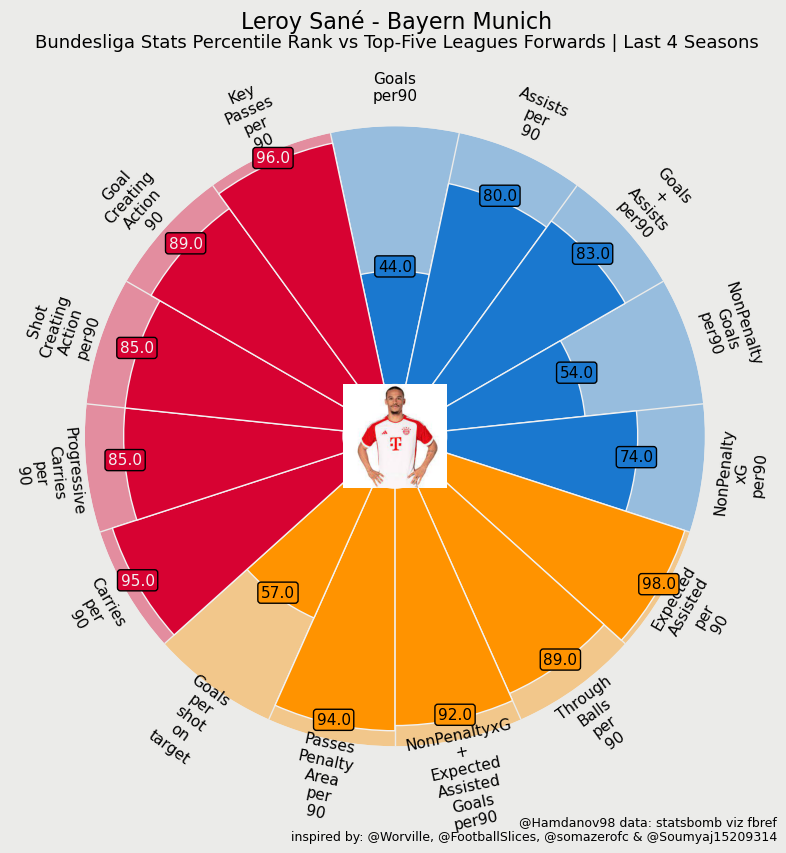

In [38]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Sane_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Leroy Sané - Bayern Munich", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Forwards | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Salah/Sane_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png

In [39]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [40]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [41]:
# Get salah's row and compute cosine similarity
salah_2022_index = player_2024.index[player_2024['Player'] == 'Mohamed Salah'][0]
salah_2022_data = transformed_df.loc[salah_2022_index].values.reshape(1, -1)

# Remove salah from the dataset for comparison
transformed_df = transformed_df.drop(index=salah_2022_index)

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, salah_2022_data).flatten()
transformed_df['similarity_to_salah_2022'] = similarity_scores

# Get top 10 players most similar to de salah
top_similar_players_indices = transformed_df.sort_values('similarity_to_salah_2022', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [43]:
player_2024['similarity_to_salah_2022']=transformed_df['similarity_to_salah_2022']
player_2024[['Player', 'similarity_to_salah_2022']]

,Player,similarity_to_salah_2022
0,Max Aarons,-0.777225
1,Brenden Aaronson,0.639837
2,Yunis Abdelhamid,-0.585956
3,Salis Abdul Samed,-0.797270
4,Laurent Abergel,-0.531996
...,...,...
1492,Duván Zapata,0.638437
1493,Bryan Zaragoza,0.672438
1494,Nadir Zortea,0.242919
1495,Milan Đurić,0.046541


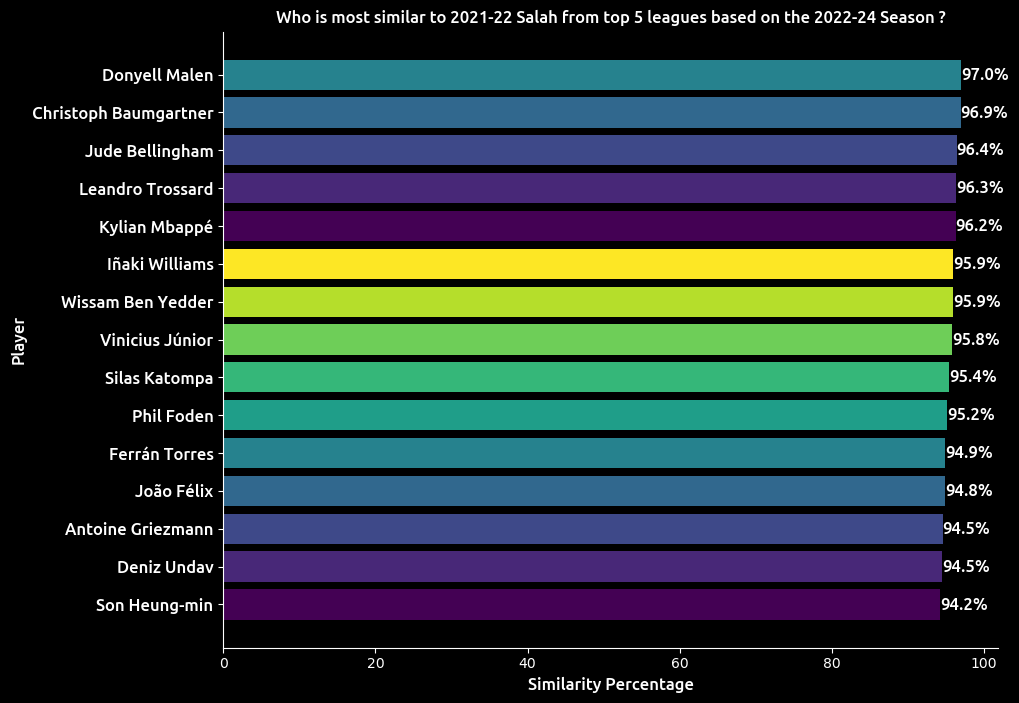

In [44]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_salah_2022 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_salah_2022', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_salah_2022'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to 2021-22 Salah from top 5 leagues based on the 2022-24 Season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Salah_2022/Similar_2022.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()

In [45]:
Malen=player_2024[player_2024['Player']=='Donyell Malen']
Malen

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_salah_2022
794,1583,Donyell Malen,nl NED,"FW,MF",Dortmund,de Bundesliga,0.0,1999.0,27,21,1781,19.8,0.66,0.71,0.66,0.71,0.48,0.63,0.48,0.63,95.0,42.0,44.2,40.0,42.1,40.4,0.51,3.94,13.23,23.99,5.96,40.4,4.8,2.12,2.02,28.18,198.64,98.84,3.69,2.47,2.27,-2.58,-1.97,31.87,8.23,3.74,0.71,2.47,0.0,0.35,0.66,0.2,0.05,0.3,0.0,0.1,0.15,0.1,0.05,410.0,546.0,75.1,5627.0,1551.0,262.0,310.0,84.5,109.0,144.0,75.7,18.0,33.0,54.5,0.05,0.15,0.17,-0.1,1.11,1.06,1.82,0.3,2.88,27.58,26.52,0.91,0.2,0.3,0.2,1.97,0.45,0.2,0.0,0.0,0.0,20.71,0.15,1.16,3.64,1.82,0.18,0.36,0.14,3.5,3.5,26.9,-0.25,-0.0,-0.0,-0.56,1.21,0.15,0.1,0.35,0.05,-0.0,3.59,0.35,-0.96,0.56,0.25,0.15,0.15,0.1,0.3,0.2,0.56,0.2,0.66,0.4,0.0,33.3,0.969905


In [46]:
# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of schlotterbeck's stats from the percentile ranks DataFrame
Malen_percentile_ranks = round(players_percentile_ranks.iloc[[794]], 0)

# Print the percentile ranks for schlotterbeck
Malen_percentile_ranks

,Goals_per90,Assists_per_90,G+A_per90,G-PK_per90,npxG_per90,xA_per_90,Through_Balls_per_90,npxG+xAG_per90,Passes_Penalty_Area_per_90,Goals_per_shot_on_target,Carries_per_90,Progressive_Carries_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Key_Passes_per_90
794,98.0,38.0,95.0,99.0,97.0,84.0,88.0,96.0,93.0,70.0,38.0,91.0,87.0,97.0,64.0


In [47]:
Malen_percentile_ranks_list = Malen_percentile_ranks.values.flatten().tolist()

Malen_percentile_ranks_list

[98.0,
 38.0,
 95.0,
 99.0,
 97.0,
 84.0,
 88.0,
 96.0,
 93.0,
 70.0,
 38.0,
 91.0,
 87.0,
 97.0,
 64.0]

In [48]:
image_path = "Salah_2022/Malen.png"
fdj_cropped = Image.open(image_path)

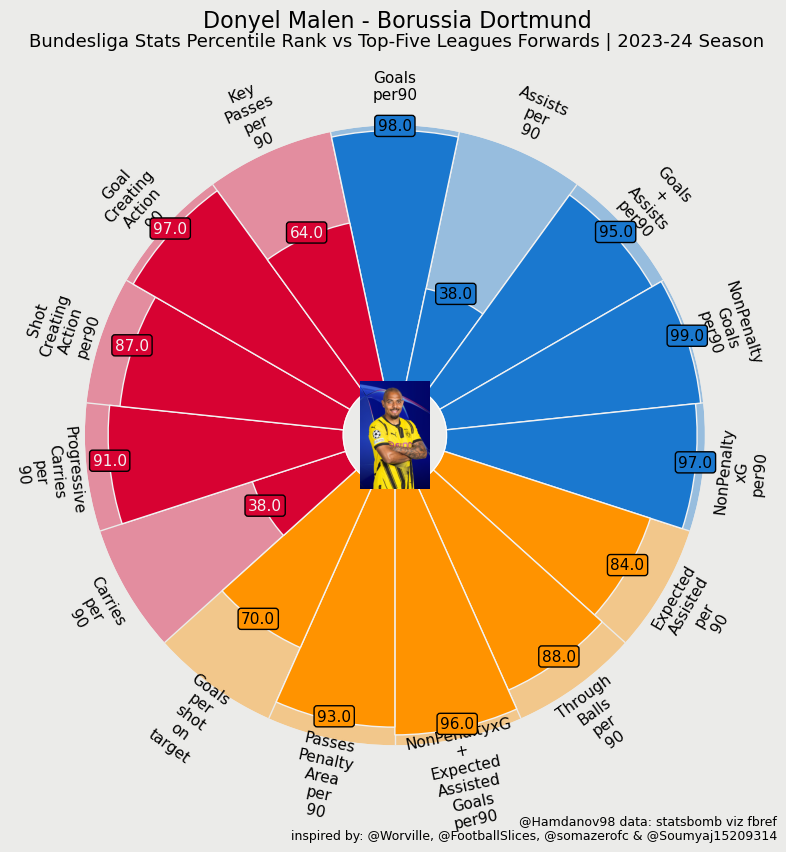

In [49]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Malen_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Donyel Malen - Borussia Dortmund", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Forwards | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Salah_2022/Malen_2024_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png